<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/16424_Fundus_cat_DR_glaucoma_normal_VGG16_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np

In [2]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=(1/255))

In [3]:
trainimages = datagen.flow_from_directory('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/train',
                                          target_size=(224, 224))

valimages = datagen.flow_from_directory('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/val',
                                        target_size=(224, 224))

testimages = datagen.flow_from_directory('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/test',
                                         target_size=(224, 224))



Found 2945 images belonging to 4 classes.
Found 841 images belonging to 4 classes.
Found 426 images belonging to 4 classes.


In [4]:
import keras
VGG = keras.applications.VGG16(include_top=False,
                               weights="imagenet",
                               input_shape=(224,224,3))
VGG.trainable=False

58889256/58889256 [==============================] - 3s 0us/step


In [5]:
from keras.models import Sequential

model = keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(4, activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21204292 (80.89 MB)
Trainable params: 6489604 (24.76 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [6]:
model.fit(trainimages,
          batch_size=32,
          epochs=1,
          validation_data=valimages)
model.save('funduscatDRglaucomanormal_model.keras')

93/93 [==============================] - 2264s 24s/step - loss: 0.7385 - accuracy: 0.7100 - val_loss: 0.4530 - val_accuracy: 0.8026


In [7]:
y_pred = model.predict(testimages)
y_pred

14/14 [==============================] - 294s 21s/step


array([[2.1699871e-06, 9.9978185e-01, 1.7849896e-04, 3.7369307e-05],
       [7.6250088e-01, 1.2699061e-03, 2.3195028e-01, 4.2788764e-03],
       [8.6484132e-03, 4.7729388e-03, 8.9985985e-01, 8.6718693e-02],
       ...,
       [6.7815758e-02, 9.3893131e-04, 8.7106681e-01, 6.0178626e-02],
       [1.2626833e-02, 1.6680721e-02, 8.7762439e-01, 9.3068011e-02],
       [3.9943415e-04, 2.8374951e-02, 6.2197834e-02, 9.0902776e-01]],
      dtype=float32)

In [11]:
y_true = testimages.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [8]:
y_pred1 = np.argmax(y_pred, axis=1)
y_pred1

array([1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 1, 0, 1,
       0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 3, 2, 2, 3, 1,
       2, 2, 0, 2, 0, 2, 2, 0, 2, 3, 2, 2, 3, 2, 1, 1, 3, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 1, 3, 0, 3, 2, 0, 1, 3, 0, 2, 3, 3, 1, 1, 0, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 3, 0, 2, 0, 0, 2, 3, 0,
       1, 0, 2, 2, 0, 0, 1, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2, 3, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 0, 0, 2, 3, 0, 2, 2, 3, 0, 2, 0, 1, 1, 3, 1,
       1, 2, 1, 0, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 3, 0, 2, 1, 1, 3, 2,
       2, 1, 2, 2, 1, 0, 0, 0, 0, 3, 2, 2, 1, 0, 3, 2, 2, 2, 1, 0, 1, 2,
       3, 2, 2, 2, 1, 0, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 3, 1, 2, 1, 1, 1, 2, 3, 2, 2, 0, 3, 1, 2, 2, 0, 1, 1,
       0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 3, 3, 1, 1, 2, 2, 1,
       0, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 3, 2, 2, 0, 0, 0, 1,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 3, 0, 2, 0,

In [9]:
testimages.class_indices

{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}

In [12]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred1)

array([[26, 34, 34, 11],
       [31, 28, 40, 12],
       [27, 28, 40,  7],
       [37, 21, 32, 18]])

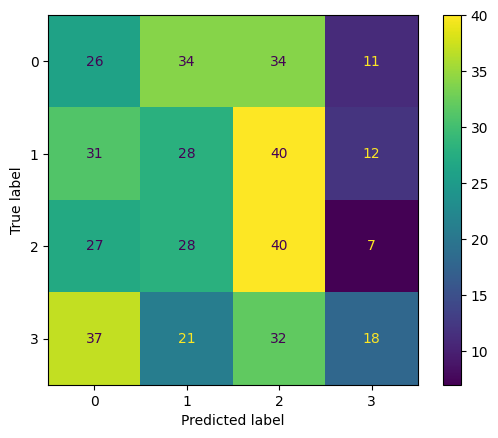

In [13]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred1)

In [14]:
print(metrics.classification_report(y_true, y_pred1))

              precision    recall  f1-score   support

           0       0.21      0.25      0.23       105
           1       0.25      0.25      0.25       111
           2       0.27      0.39      0.32       102
           3       0.38      0.17      0.23       108

    accuracy                           0.26       426
   macro avg       0.28      0.26      0.26       426
weighted avg       0.28      0.26      0.26       426



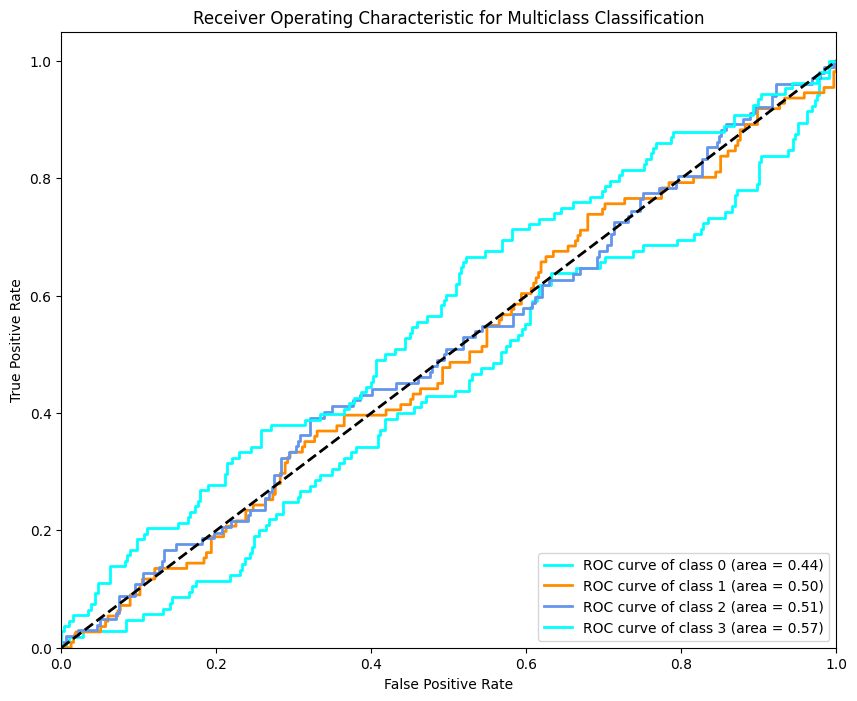

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

# Assuming you have your model predictions and ground truth labels
# model_predictions = Your model's predicted probabilities for each class
# ground_truth_labels = Ground truth labels for each sample

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
ground_truth_labels_binary = label_binarizer.fit_transform(y_true)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_binarizer.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ground_truth_labels_binary[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_binarizer.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def VGG16():
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4, activation='softmax'))  # Assuming 1000 classes for ImageNet

    return model

# Create VGG16 model
vgg16_model = VGG16()

# Display model summary
vgg16_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   